<a href="https://colab.research.google.com/github/maheshs11/computer-vision/blob/main/yolov7_instance_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YOLOv7-instance segmentation depends on detectron2 so let's install it.

In [ ]:
! pip install 'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-qgotzkv2
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-qgotzkv2
     |████████████████████████████████| 50 kB 5.5 MB/s 
     |████████████████████████████████| 79 kB 9.2 MB/s 
     |████████████████████████████████| 151 kB 89.3 MB/s 
     |████████████████████████████████| 1.4 MB 89.7 MB/s 
     |████████████████████████████████| 509 kB 81.4 MB/s 
     |████████████████████████████████| 248 kB 70.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 843 kB 86.7 MB/s 
     |████████████████████████████████| 96 kB 7.2 MB/s 
     |████████████████████████████████| 117 kB 87.6 MB/s 
  Created whee

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/yolov7/instance

/content/drive/MyDrive/yolov7/instance


In [ ]:
# # download a sample dataset with annotations
# !wget https://universe.roboflow.com/ds/12q8LoeKsK?key=pJlkNzlaVn

In [ ]:
# %cd /content/drive/MyDrive/yolov7/instance/12q8LoeKsK?key=pJlkNzlaVn (Unzipped Files)

In [ ]:
# !unzip /content/drive/MyDrive/yolov7/yolov7-u7.zip -d /content/drive/MyDrive/yolov7/yolov7-u7

In [ ]:
import pandas as pd
import os
import yaml

In [ ]:
# !pip install -qU wandb

In [ ]:
# # Log in to your W&B account
# import wandb
# wandb.login()

True

In [ ]:
data = dict(
    train =  '/content/drive/MyDrive/yolov7/instance/12q8LoeKsK?key=pJlkNzlaVn (Unzipped Files)/train/',
    val   =  '/content/drive/MyDrive/yolov7/instance/12q8LoeKsK?key=pJlkNzlaVn (Unzipped Files)/valid/',
    nc    = 26,
    names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 
             'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
    )

with open(os.path.join( '/content/drive/MyDrive/yolov7/instance' , 'gbr.yaml'), 'w') as outfile:
    yaml.dump(data, outfile, default_flow_style=False)

In [ ]:
%%writefile /content/drive/MyDrive/yolov7/instance/yolov7-seg.yaml
# YOLOv7

# Parameters
nc: 26  # number of classes
depth_multiple: 1.0  # model depth multiple
width_multiple: 1.0  # layer channel multiple
anchors:
  - [12,16, 19,36, 40,28]  # P3/8
  - [36,75, 76,55, 72,146]  # P4/16
  - [142,110, 192,243, 459,401]  # P5/32

# YOLOv7 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [32, 3, 1]],  # 0
  
   [-1, 1, Conv, [64, 3, 2]],  # 1-P1/2      
   [-1, 1, Conv, [64, 3, 1]],
   
   [-1, 1, Conv, [128, 3, 2]],  # 3-P2/4  
   [-1, 1, Conv, [64, 1, 1]],
   [-2, 1, Conv, [64, 1, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [256, 1, 1]],  # 11
         
   [-1, 1, MP, []],
   [-1, 1, Conv, [128, 1, 1]],
   [-3, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [128, 3, 2]],
   [[-1, -3], 1, Concat, [1]],  # 16-P3/8  
   [-1, 1, Conv, [128, 1, 1]],
   [-2, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [512, 1, 1]],  # 24
         
   [-1, 1, MP, []],
   [-1, 1, Conv, [256, 1, 1]],
   [-3, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 2]],
   [[-1, -3], 1, Concat, [1]],  # 29-P4/16  
   [-1, 1, Conv, [256, 1, 1]],
   [-2, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [1024, 1, 1]],  # 37
         
   [-1, 1, MP, []],
   [-1, 1, Conv, [512, 1, 1]],
   [-3, 1, Conv, [512, 1, 1]],
   [-1, 1, Conv, [512, 3, 2]],
   [[-1, -3], 1, Concat, [1]],  # 42-P5/32  
   [-1, 1, Conv, [256, 1, 1]],
   [-2, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [1024, 1, 1]],  # 50
  ]

# yolov7 head
head:
  [[-1, 1, SPPCSPC, [512]], # 51
  
   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [37, 1, Conv, [256, 1, 1]], # route backbone P4
   [[-1, -2], 1, Concat, [1]],
   
   [-1, 1, Conv, [256, 1, 1]],
   [-2, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [256, 1, 1]], # 63
   
   [-1, 1, Conv, [128, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [24, 1, Conv, [128, 1, 1]], # route backbone P3
   [[-1, -2], 1, Concat, [1]],
   
   [-1, 1, Conv, [128, 1, 1]],
   [-2, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [128, 1, 1]], # 75
      
   [-1, 1, MP, []],
   [-1, 1, Conv, [128, 1, 1]],
   [-3, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [128, 3, 2]],
   [[-1, -3, 63], 1, Concat, [1]],
   
   [-1, 1, Conv, [256, 1, 1]],
   [-2, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [256, 1, 1]], # 88
      
   [-1, 1, MP, []],
   [-1, 1, Conv, [256, 1, 1]],
   [-3, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 2]],
   [[-1, -3, 51], 1, Concat, [1]],
   
   [-1, 1, Conv, [512, 1, 1]],
   [-2, 1, Conv, [512, 1, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [512, 1, 1]], # 101
   
   [75, 1, Conv, [256, 3, 1]],
   [88, 1, Conv, [512, 3, 1]],
   [101, 1, Conv, [1024, 3, 1]],

   [[102, 103, 104], 1, ISegment, [nc, anchors, 32, 256]],  # Detect(P3, P4, P5)
  ]


Overwriting /content/drive/MyDrive/yolov7/instance/yolov7-seg.yaml


In [ ]:
%%writefile /content/drive/MyDrive/yolov7/instance/hyp.scratch-high.yaml

lr0: 0.01  # initial learning rate (SGD=1E-2, Adam=1E-3)
lrf: 0.1  # final OneCycleLR learning rate (lr0 * lrf)
momentum: 0.937  # SGD momentum/Adam beta1
weight_decay: 0.0005  # optimizer weight decay 5e-4
warmup_epochs: 3.0  # warmup epochs (fractions ok)
warmup_momentum: 0.8  # warmup initial momentum
warmup_bias_lr: 0.1  # warmup initial bias lr
box: 0.05  # box loss gain
cls: 0.3  # cls loss gain
cls_pw: 1.0  # cls BCELoss positive_weight
obj: 0.7  # obj loss gain (scale with pixels)
obj_pw: 1.0  # obj BCELoss positive_weight
iou_t: 0.20  # IoU training threshold
anchor_t: 4.0  # anchor-multiple threshold
# anchors: 3  # anchors per output layer (0 to ignore)
fl_gamma: 0.0  # focal loss gamma (efficientDet default gamma=1.5)
hsv_h: 0.015  # image HSV-Hue augmentation (fraction)
hsv_s: 0.7  # image HSV-Saturation augmentation (fraction)
hsv_v: 0.4  # image HSV-Value augmentation (fraction)
degrees: 0.0  # image rotation (+/- deg)
translate: 0.1  # image translation (+/- fraction)
scale: 0.9  # image scale (+/- gain)
shear: 0.0  # image shear (+/- deg)
perspective: 0.0  # image perspective (+/- fraction), range 0-0.001
flipud: 0.0  # image flip up-down (probability)
fliplr: 0.5  # image flip left-right (probability)
mosaic: 1.0  # image mosaic (probability)
mixup: 0.1  # image mixup (probability)
copy_paste: 0.1  # segment copy-paste (probability)


Overwriting /content/drive/MyDrive/yolov7/instance/hyp.scratch-high.yaml


In [ ]:
%cd /content/drive/MyDrive/yolov7/yolov7-u7/yolov7-u7/seg/segment

/content/drive/MyDrive/yolov7/yolov7-u7/yolov7-u7/seg/segment


In [ ]:
# # download pretrained weight
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-seg.pt

In [ ]:
! python train.py --data /content/drive/MyDrive/yolov7/instance/gbr.yaml --batch 16 --weights /content/drive/MyDrive/yolov7/yolov7-u7/yolov7-u7/seg/yolov7-seg.pt --cfg /content/drive/MyDrive/yolov7/instance/yolov7-seg.yaml --epochs 100 --name yolov7_seg --img 640 --hyp /content/drive/MyDrive/yolov7/instance/hyp.scratch-high.yaml

segment/train: weights=/content/drive/MyDrive/yolov7/yolov7-u7/yolov7-u7/seg/yolov7-seg.pt, cfg=/content/drive/MyDrive/yolov7/instance/yolov7-seg.yaml, data=/content/drive/MyDrive/yolov7/instance/gbr.yaml, hyp=/content/drive/MyDrive/yolov7/instance/hyp.scratch-high.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=../runs/train-seg, name=yolov7_seg, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
YOLOv5 🚀 2022-9-9 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla V100-SXM2-16GB, 16160MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_pw=1.0, o

In [ ]:
# check inference on 1 test image
! python predict.py --weights ../runs/train-seg/yolov7_seg/weights/best.pt --source '/content/drive/MyDrive/yolov7/instance/12q8LoeKsK?key=pJlkNzlaVn (Unzipped Files)/test/images/A0_jpg.rf.85d6d50444ff5baea428fb3c275a9349.jpg' 

segment/predict: weights=['../runs/train-seg/yolov7_seg/weights/best.pt'], source=/content/drive/MyDrive/yolov7/instance/12q8LoeKsK?key=pJlkNzlaVn (Unzipped Files)/test/images/A0_jpg.rf.85d6d50444ff5baea428fb3c275a9349.jpg, data=../data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
requirements: ipython not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /content/drive/MyDrive/yolov7/yolov7-u7/yolov7-u7/seg/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-

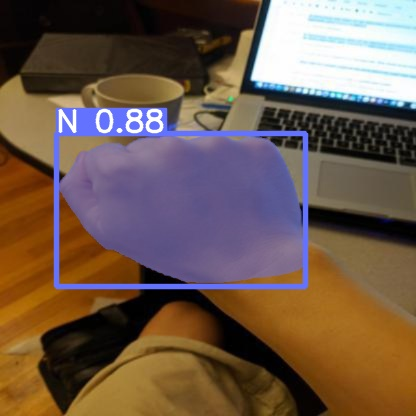

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/yolov7/yolov7-u7/yolov7-u7/seg/runs/predict-seg/exp/A0_jpg.rf.85d6d50444ff5baea428fb3c275a9349.jpg')

In [ ]:
# check inference on directory
! python predict.py --weights ../runs/train-seg/yolov7_seg/weights/best.pt --source '/content/drive/MyDrive/yolov7/instance/12q8LoeKsK?key=pJlkNzlaVn (Unzipped Files)/test/images' 

segment/predict: weights=['../runs/train-seg/yolov7_seg/weights/best.pt'], source=/content/drive/MyDrive/yolov7/instance/12q8LoeKsK?key=pJlkNzlaVn (Unzipped Files)/test/images, data=../data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2022-9-9 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla V100-SXM2-16GB, 16160MiB)

Fusing layers... 
yolov7-seg summary: 325 layers, 37977326 parameters, 0 gradients
image 1/68 /content/drive/MyDrive/yolov7/instance/12q8LoeKsK?key=pJlkNzlaVn (Unzipped Files)/test/images/A0_jpg.rf.85d6d50444ff5baea428fb3c275a9349.jpg: 640x640 1 N, 14.4ms
image 2/68 /content/drive/MyDrive/yolov7/instance/12q8LoeKsK?key=pJlkNzlaVn (Unzipp

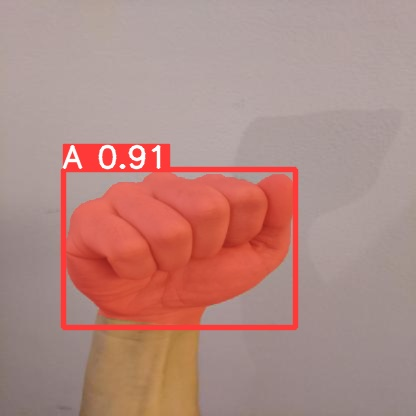

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/yolov7/yolov7-u7/yolov7-u7/seg/runs/predict-seg/exp2/A12_jpg.rf.8deaf8a00dd0de4750cbfc09e60e0936.jpg')

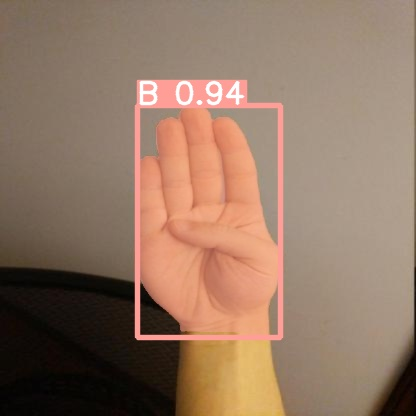

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/yolov7/yolov7-u7/yolov7-u7/seg/runs/predict-seg/exp2/B14_jpg.rf.9f2a38d2c9201978de00cb0300797add.jpg')

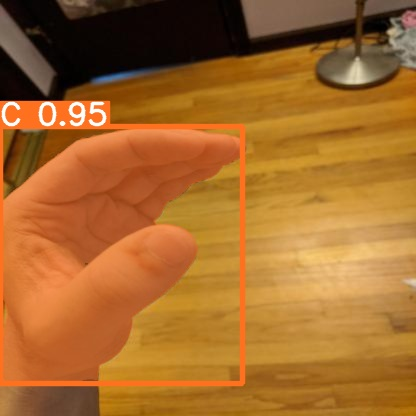

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/yolov7/yolov7-u7/yolov7-u7/seg/runs/predict-seg/exp2/C0_jpg.rf.e28b1ce1a7598f06faa61c2fc7202429.jpg')

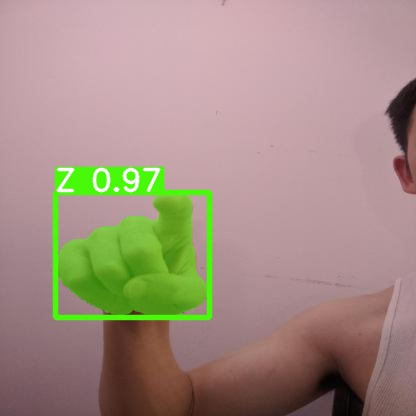

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/yolov7/yolov7-u7/yolov7-u7/seg/runs/predict-seg/exp2/Z11_jpg.rf.e3b0fc813d575073bedeea5c38801871.jpg')

In [ ]:
# test inference on a video
! python predict.py --weights ../runs/train-seg/yolov7_seg/weights/best.pt
 --source /content/drive/MyDrive/yolov7/instance/asl-alphabet-a-z.mp4 

In [ ]:
# test inference on a video
! python predict.py --weights ../runs/train-seg/yolov7_seg/weights/best.pt --source /content/drive/MyDrive/yolov7/instance/asl-alphabet-a-z.mp4 

segment/predict: weights=['../runs/train-seg/yolov7_seg/weights/best.pt'], source=/content/drive/MyDrive/yolov7/instance/asl-alphabet-a-z.mp4, data=../data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2022-9-9 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla V100-SXM2-16GB, 16160MiB)

Fusing layers... 
yolov7-seg summary: 325 layers, 37977326 parameters, 0 gradients
video 1/1 (1/1480) /content/drive/MyDrive/yolov7/instance/asl-alphabet-a-z.mp4: 384x640 1 Q, 21.8ms
video 1/1 (2/1480) /content/drive/MyDrive/yolov7/instance/asl-alphabet-a-z.mp4: 384x640 (no detections), 14.4ms
video 1/1 (3/1480) /content/drive/MyDrive/yolov7/instance/asl-alphabet-a-z.mp4

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = "/content/drive/MyDrive/yolov7/yolov7-u7/yolov7-u7/seg/runs/predict-seg/exp3/asl-alphabet-a-z.mp4"

# Compressed video path
compressed_path = "/content/drive/MyDrive/yolov7/yolov7-u7/yolov7-u7/seg/runs/predict-seg/exp3/asl-alphabet-a-z_compress.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)